In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Load the cleaned dataset
file_path = "../data/project_data_cleaned.csv"
data = pd.read_csv(file_path)
print(data.head())


        date               opponent  w/l  sp   k   e   ta    pct  ast  sa  se  \
0  8/18/2023               vs Grace    0   4  38  32  148  0.041   37   6  10   
1  8/18/2023              vs Bethel    0   3  38  20  124  0.145   38   5   5   
2  8/19/2023  vs Indiana South Bend    1   3  41   9  106  0.302   33   8   3   
3  8/19/2023   vs Indiana Northwest    1   3  38  29  122  0.074   35   7   6   
4   9/6/2023    at Cornerstone (MI)    0   3  21  20  107  0.009   21   2   4   

   re  dig  bs  ba  be   tb  bhe   pts  year  
0   9   57   0  16   5  8.0    0  52.0  2023  
1   8   53   0  12   1  6.0    1  49.0  2023  
2   2   48   0  16   0  8.0    0  57.0  2023  
3   2   60   0  12   1  6.0    0  51.0  2023  
4   6   52   2   8   1  6.0    0  29.0  2023  


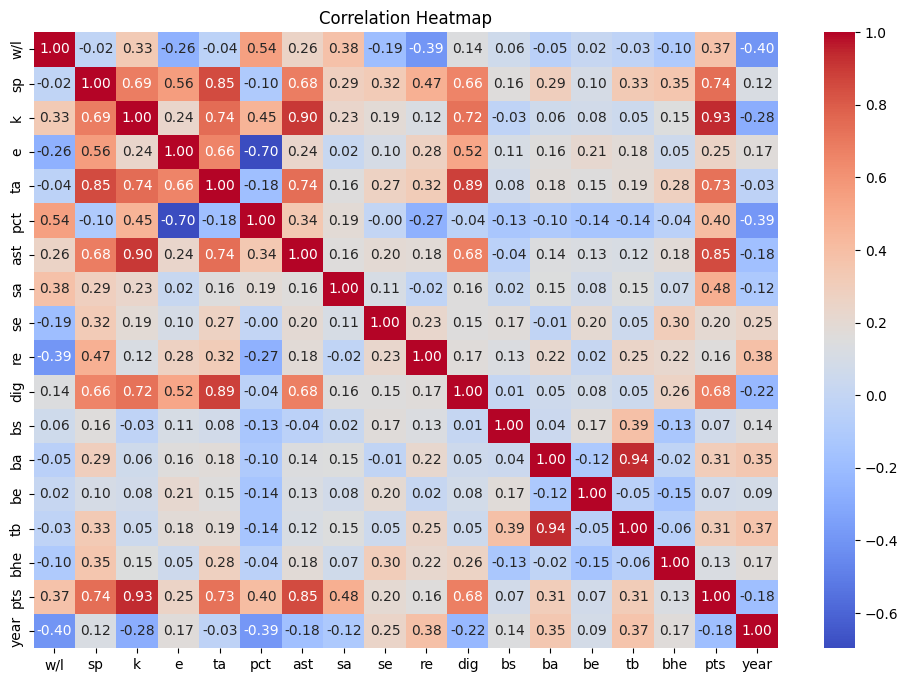

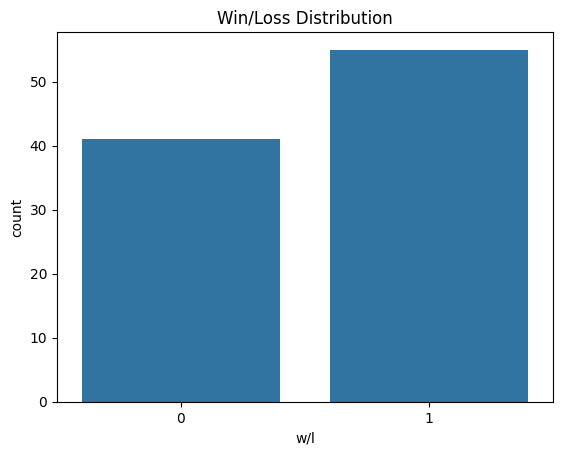

In [3]:
# Drop non-numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=["number"])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of W/L (win probability)
sns.countplot(x="w/l", data=data)
plt.title("Win/Loss Distribution")
plt.show()


In [4]:
# Encoding categorical features
label_encoders = {}
categorical_columns = data.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
X = data.drop(columns=["w/l", "date"])  # Drop target and date
y = data["w/l"]  # Win/Loss as target

# Scale features if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
# Initialize models
logistic_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Train Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print()

evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.7500
Precision: 0.7500
Recall: 0.8182
ROC-AUC: 0.7424

--- Random Forest ---
Accuracy: 0.8500
Precision: 0.8333
Recall: 0.9091
ROC-AUC: 0.8434



In [6]:
import pandas as pd
import logging

# Load the preprocessed data
file_path = "../data/project_data_cleaned.csv"
data = pd.read_csv(file_path)

# Add basic game metrics
data["k_per_sp"] = data["k"] / data["sp"]
data["e_per_sp"] = data["e"] / data["sp"]
data["pts_per_sp"] = data["pts"] / data["sp"]

# Save the updated data
updated_file_path = file_path.replace("_cleaned.csv", "_enhanced.csv")
data.to_csv(updated_file_path, index=False)

# Logging the updates
logging.info(f"Added basic game metrics: k_per_sp, e_per_sp, pts_per_sp.")
logging.info(f"Updated data saved to {updated_file_path}.")
print(f"New features added and saved to {updated_file_path}.")


New features added and saved to ../data/project_data_enhanced.csv.


In [7]:
# Add performance ratios
data["ast_to_e"] = data["ast"] / (data["e"] + 1e-5)  # Avoid division by zero
data["sa_minus_se"] = data["sa"] - data["se"]
data["total_blocks"] = data["bs"] + data["ba"]

# Save the updated data again
data.to_csv(updated_file_path, index=False)

# Logging the updates
logging.info(f"Added performance ratios: ast_to_e, sa_minus_se, total_blocks.")
logging.info(f"Updated data with performance ratios saved to {updated_file_path}.")
print(f"Performance ratios added and saved to {updated_file_path}.")


Performance ratios added and saved to ../data/project_data_enhanced.csv.


In [8]:
from sklearn.preprocessing import StandardScaler

# Columns to scale (exclude non-numerical and target column)
columns_to_scale = data.select_dtypes(include=["int64", "float64"]).columns.difference(["w/l"])

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Save the scaled data
scaled_file_path = "../data/project_data_scaled.csv"
data.to_csv(scaled_file_path, index=False)

# Logging the scaling
logging.info(f"Scaled features: {list(columns_to_scale)}")
logging.info(f"Scaled data saved to {scaled_file_path}.")
print(f"Scaled features saved to {scaled_file_path}.")


Scaled features saved to ../data/project_data_scaled.csv.


In [9]:
from sklearn.model_selection import cross_val_score

# Initialize Random Forest with default parameters
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Log the cross-validation results
logging.info(f"Cross-validation scores: {cv_scores}")
logging.info(f"Mean cross-validation score: {cv_scores.mean():.4f}")

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.8        0.57894737 1.         0.84210526 0.68421053]
Mean cross-validation score: 0.7811


In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X, y)

# Log the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
logging.info(f"Best parameters: {best_params}")
logging.info(f"Best cross-validation score: {best_score:.4f}")

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Train the optimized Random Forest model
optimized_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)

optimized_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimized_rf_model.predict(X_test)
y_proba = optimized_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

logging.info("--- Optimized Random Forest Evaluation ---")
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision: {precision:.4f}")
logging.info(f"Recall: {recall:.4f}")
logging.info(f"ROC-AUC: {roc_auc:.4f}")

print("--- Optimized Random Forest Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Optimized Random Forest Evaluation ---
Accuracy: 0.8500
Precision: 0.8333
Recall: 0.9091
ROC-AUC: 0.8687

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.83      0.91      0.87        11

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20



In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Original feature names
original_columns = ["sp", "k", "e", "ta", "pct", "ast", "sa", "se", "re", "dig", "bs", "ba", "be", "tb", "bhe", "pts", "year"]

# Columns after preprocessing
if isinstance(X_train, pd.DataFrame):
    preprocessed_columns = X_train.columns.tolist()
else:
    preprocessed_columns = [f"Feature_{i}" for i in range(X_train.shape[1])]

# Check for mismatches
print(f"Original Columns: {len(original_columns)} -> {original_columns}")
print(f"Preprocessed Columns: {len(preprocessed_columns)} -> {preprocessed_columns}")

if len(preprocessed_columns) != len(feature_importances):
    print(f"Mismatch detected: Preprocessed columns and feature_importances differ.")
    print(f"Length of preprocessed_columns: {len(preprocessed_columns)}")
    print(f"Length of feature_importances: {len(feature_importances)}")
    raise ValueError("Mismatch between columns and feature importances!")

# Adjust original columns to match the preprocessed columns (if necessary)
# Uncomment if preprocessing removed/added features
# original_columns = preprocessed_columns  

# Create a DataFrame for feature importance
features_df = pd.DataFrame({
    "Feature": preprocessed_columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)



# Print feature importance
print("Feature Importance:")
print(features_df)


Original Columns: 17 -> ['sp', 'k', 'e', 'ta', 'pct', 'ast', 'sa', 'se', 're', 'dig', 'bs', 'ba', 'be', 'tb', 'bhe', 'pts', 'year']
Preprocessed Columns: 18 -> ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17']
Feature Importance:
       Feature  Importance
5    Feature_5    0.224654
17  Feature_17    0.118850
16  Feature_16    0.094942
9    Feature_9    0.093017
7    Feature_7    0.083389
2    Feature_2    0.076762
3    Feature_3    0.073396
6    Feature_6    0.041618
10  Feature_10    0.036533
4    Feature_4    0.031462
0    Feature_0    0.029691
14  Feature_14    0.024357
8    Feature_8    0.017850
1    Feature_1    0.016972
12  Feature_12    0.013459
15  Feature_15    0.012922
11  Feature_11    0.005871
13  Feature_13    0.004253
